<a href="https://colab.research.google.com/github/ayoub4145/churn-telecom-prediction/blob/main/Churn_telecom_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install fastapi uvicorn

In [ ]:
# installation de Kaggle
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle/

In [ ]:
! cp '/content/drive/MyDrive/Kaggle2/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Afficher les datasets existantes
! kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        295  1.0              
serkantysz/550k-spotify-songs-audio-lyrics-and-genres             550K Spotify Songs: Audio, Lyrics & Genres           246075351  2026-01-02 20:43:03.863000              0         36  1.0              
rockyt07/social-media-user-analysis                               Social Media User Analysis                           247842357  2026-01-14 02:28:41.970000              0         67  1.0     

In [ ]:
! kaggle datasets download -d terencekatua/customer-churn-dataset-telecom

Dataset URL: https://www.kaggle.com/datasets/terencekatua/customer-churn-dataset-telecom
License(s): CC0-1.0
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 399MB/s]


In [ ]:
! unzip /content/customer-churn-dataset-telecom.zip -d churn-telecom-data

Archive:  /content/customer-churn-dataset-telecom.zip
  inflating: churn-telecom-data/data.csv  


In [ ]:
! mv /content/churn-telecom-data /content/drive/MyDrive/Kaggle2

# Prédire si un client va résilier (churn) ou non, afin d’aider l’entreprise à :
* réduire la perte de clients,
* cibler les actions de fidélisation,
* augmenter le revenu.


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Kaggle2/churn-telecom-data/data.csv')
df.info()
#Pas de valeurs manquantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.duplicated().sum()
#pas de valeurs dupliquées

np.int64(0)

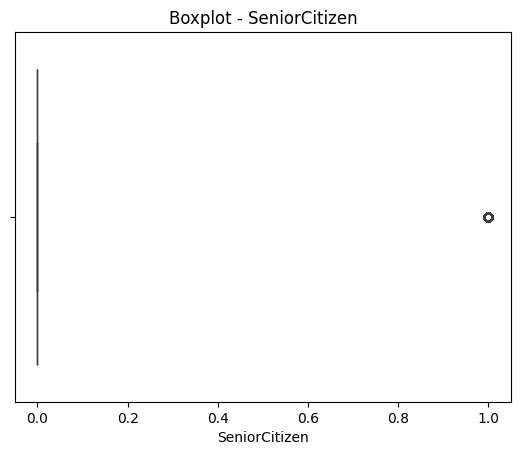

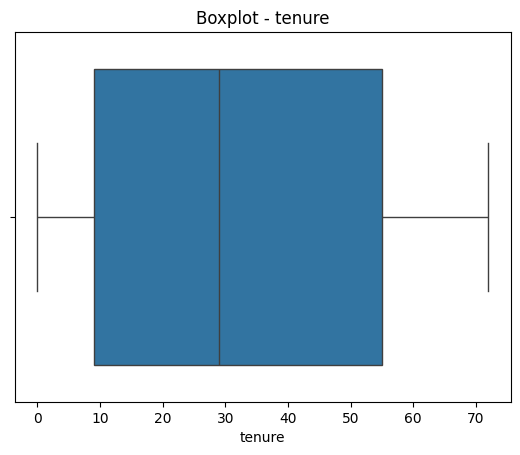

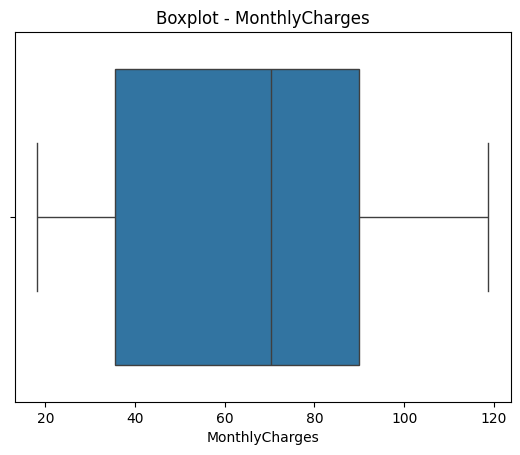

In [ ]:
#détection des valeurs aberrantes
col_nums=df.select_dtypes(include=['int64','float64']).columns
col_nums
for col in col_nums:
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot - {col}")
  plt.show()

In [ ]:
df['Churn'].value_counts(normalize=True)*100 #normlize=True pour que l'object retourné contient la frequence relative des valeurs uniques
#Dataset déséquilibré : imbalanced dataset

,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
#Remplacement de la colonne Churn par mapping
df['Churn'].head()
df['Churn']=df['Churn'].map({'Yes':1,'No':0})


In [ ]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


### 1. Handle `TotalCharges` Column

First, let's convert the `TotalCharges` column to a numeric data type. We'll use `pd.to_numeric` with `errors='coerce'` to turn any non-numeric values into `NaN`. Then we'll check for these `NaN` values and decide how to handle them (e.g., fill with the median or drop rows).

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values introduced by coercion
print(f"Number of NaN values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Handle NaN values: Fill with the median (a common approach for numerical data with few NaNs)
# Alternatively, you could drop these rows if they are a small percentage and imputation isn't desired.
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify data type and no NaNs
df.info()

Number of NaN values in TotalCharges: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

/tmp/ipython-input-3363932572.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


### 2. Encode Remaining Categorical Features

Now, let's encode the remaining `object` type columns. We'll use one-hot encoding for columns with multiple categories and map binary columns.

First, identify the remaining categorical columns.

In [ ]:
# Identify remaining object columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Drop 'customerID' as it's an identifier and not predictive
df = df.drop('customerID', axis=1)

# Exclude 'customerID' from categorical_cols for encoding
categorical_cols = [col for col in categorical_cols if col != 'customerID']

print(f"Remaining categorical columns to encode: {categorical_cols}")

# Apply one-hot encoding using pd.get_dummies
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows and info of the transformed DataFrame
display(df.head())
df.info()

Remaining categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

### 3. Visualize Correlations with a Heatmap

Now that most features are numerical, let's visualize the correlation matrix with a heatmap to better understand relationships, especially with the `Churn` variable.

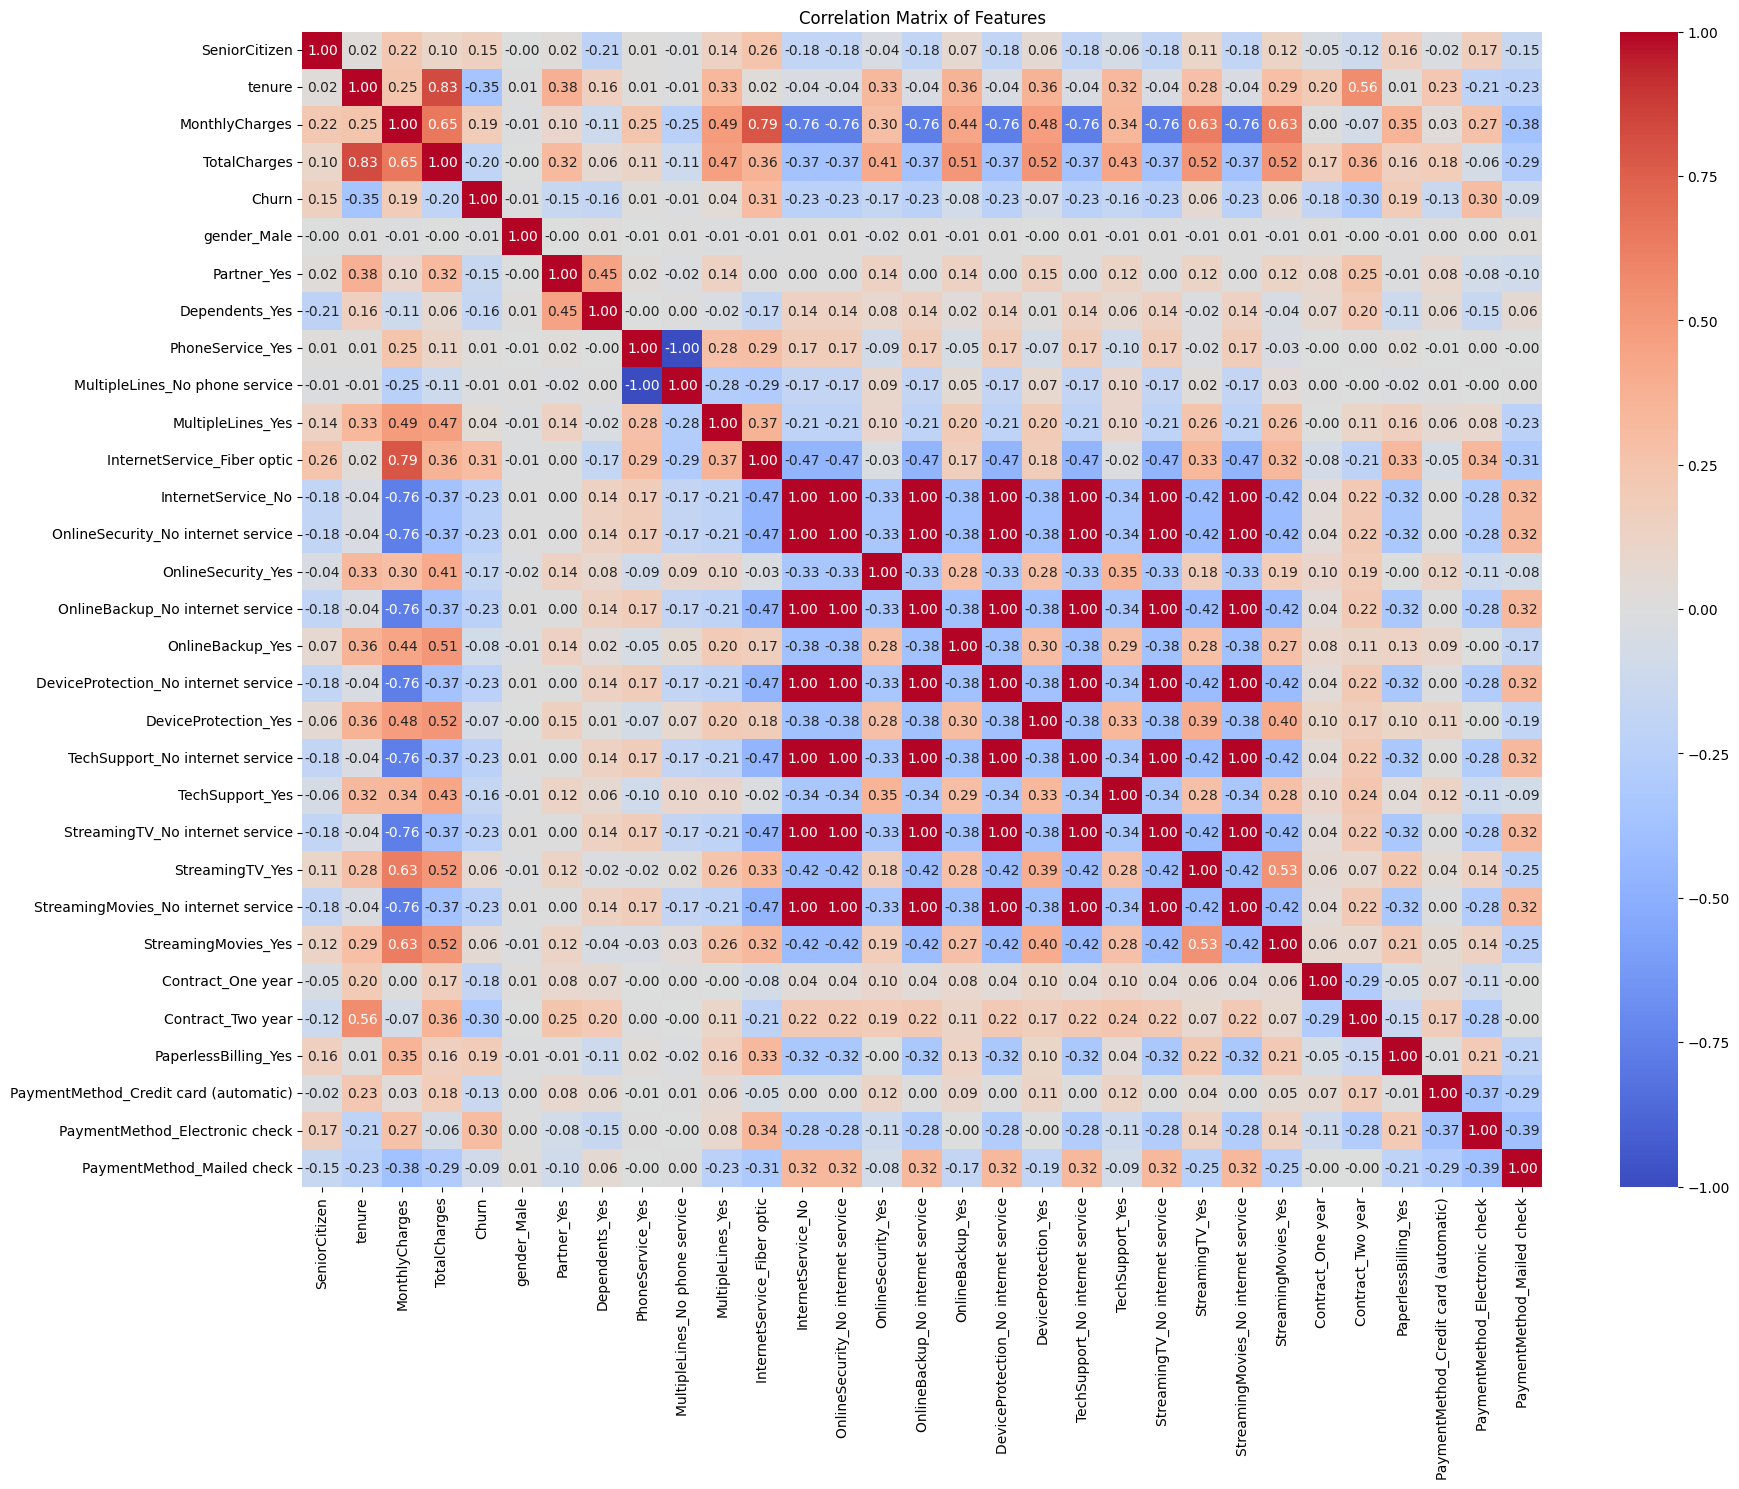

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### Next Steps:

*   **Detailed EDA for Categorical Variables:** Explore the relationship between each categorical feature (e.g., `Contract`, `PaymentMethod`) and `Churn` using bar plots.
*   **Feature Scaling:** Consider scaling numerical features if your chosen model requires it.
*   **Addressing Imbalance:** Implement techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weights during model training.
*   **Model Selection and Training:** Choose appropriate classification models (e.g., Logistic Regression, Random Forest, XGBoost) and train them.
*   **Model Evaluation:** Evaluate models using metrics like accuracy, precision, recall, F1-score, and ROC-AUC, especially given the imbalanced dataset.

# Task
Generate bar plots for each one-hot encoded categorical feature in the DataFrame `df` to visualize its relationship with the 'Churn' variable, ensuring clear titles and legends. Then, apply the Synthetic Minority Over-sampling Technique (SMOTE) to the dataset (`df`) to balance the 'Churn' variable, separating features (X) and target (y) first, and finally, display the new class distribution after SMOTE.

## Detailed EDA for Categorical Variables

### Subtask:
Create bar plots for each remaining categorical feature to visualize its distribution and its relationship with the 'Churn' variable.


**Reasoning**:
First, I'll identify all the boolean columns in the DataFrame that represent the one-hot encoded categorical features, excluding the 'Churn' column. This will create a list of features to iterate through for plotting.



In [ ]:
boolean_cols = df.select_dtypes(include='bool').columns.tolist()
print(f"Boolean columns identified for plotting: {boolean_cols}")

Boolean columns identified for plotting: ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


**Reasoning**:
Now that the boolean (one-hot encoded categorical) columns have been identified, I will iterate through each of them to create stacked bar plots. These plots will visualize the distribution of 'Churn' for each category, allowing for a detailed understanding of their relationship as requested in the subtask.



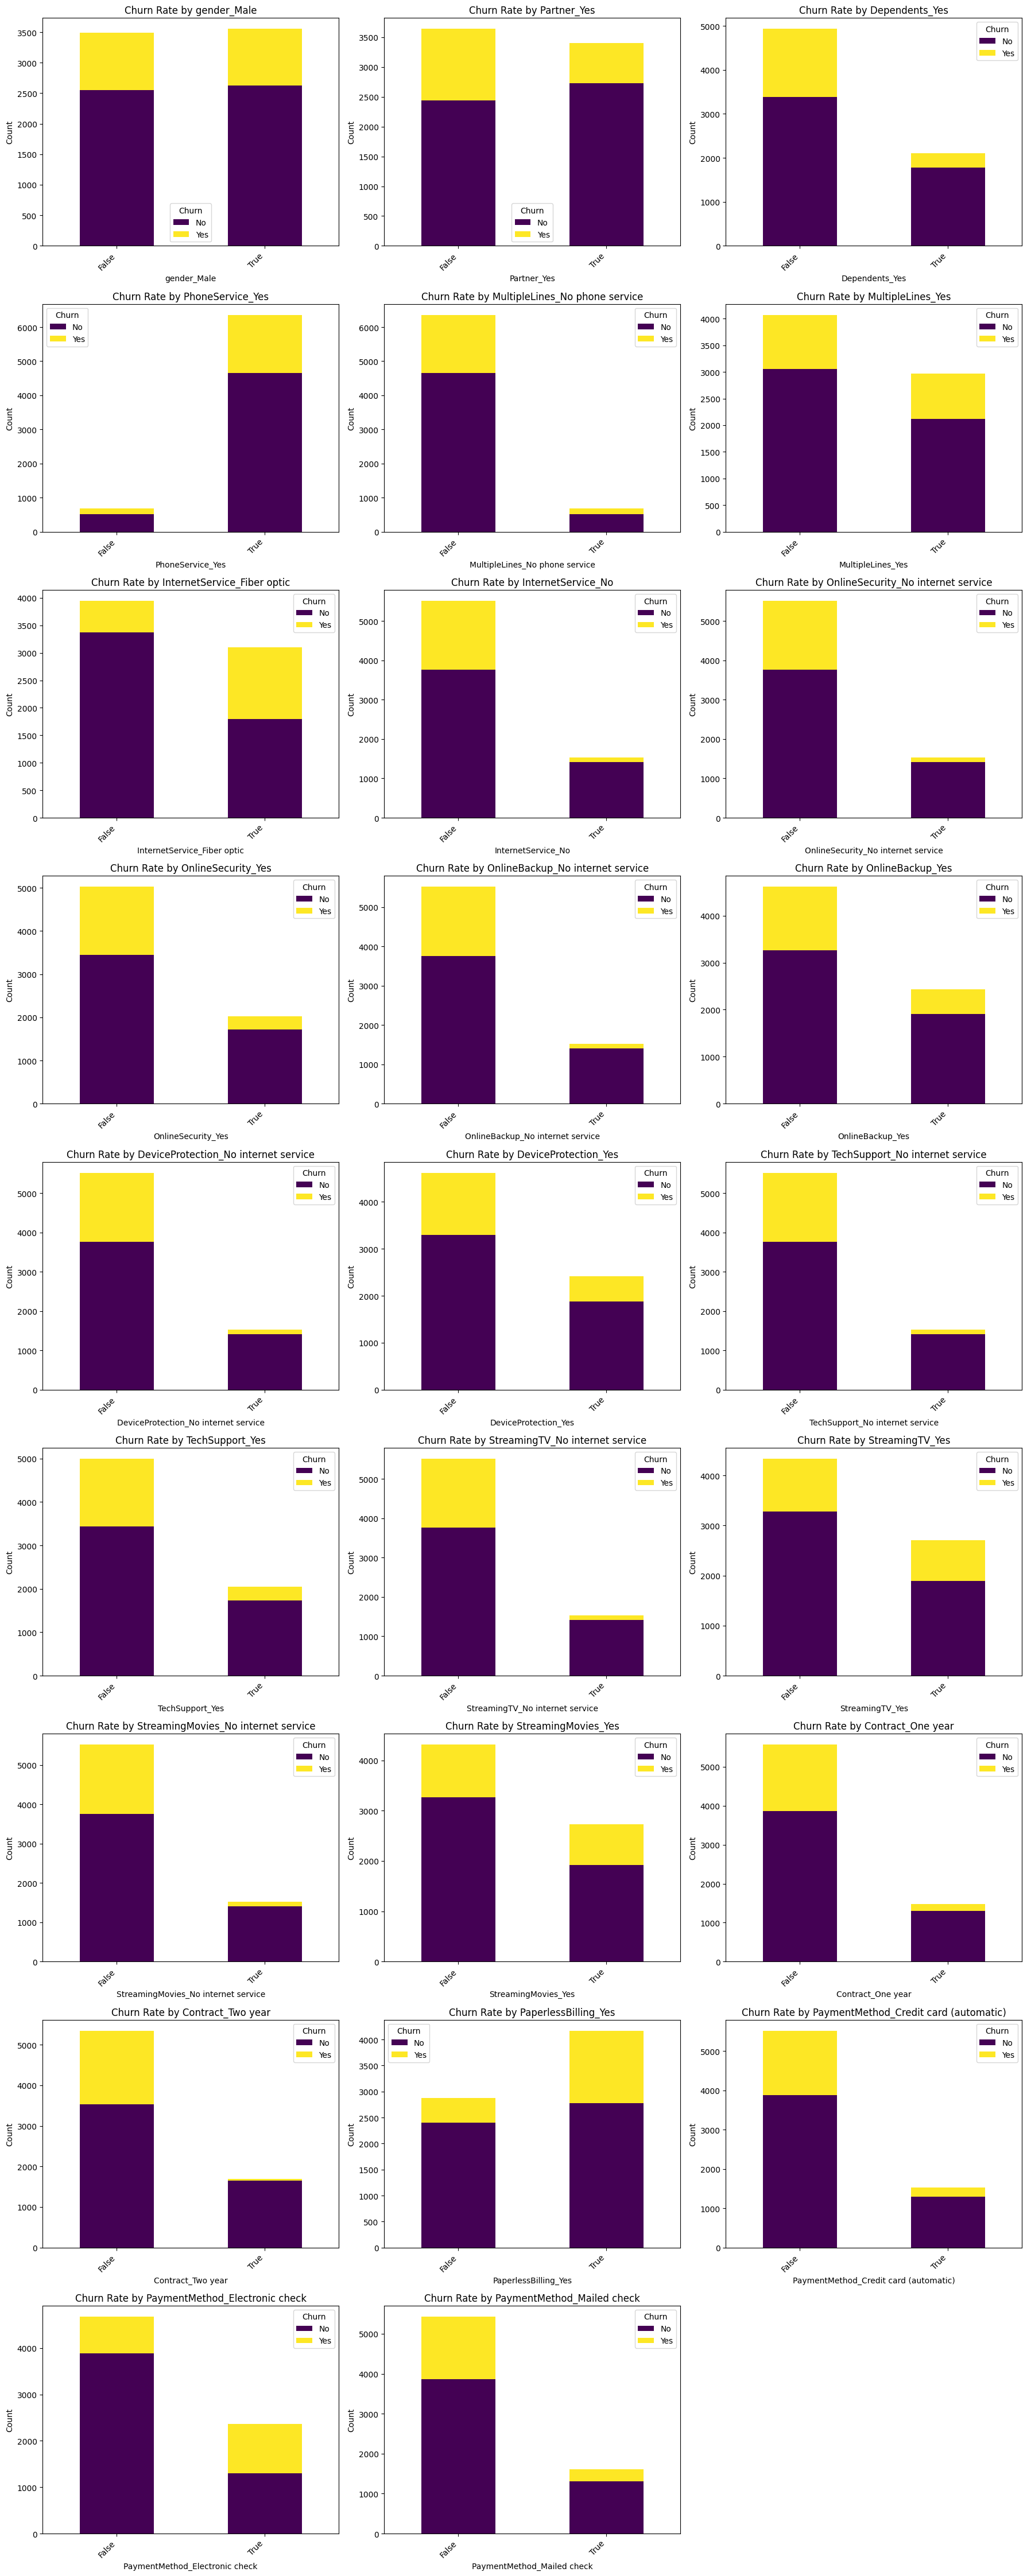

Bar plots for categorical features vs. Churn generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out 'Churn' if it's accidentally in boolean_cols (though it shouldn't be)
plot_cols = [col for col in boolean_cols if col != 'Churn']

# Determine the number of rows and columns for the subplot grid
num_plots = len(plot_cols)
num_cols = 3 # You can adjust this for desired layout
num_rows = int(np.ceil(num_plots / num_cols))

plt.figure(figsize=(num_cols * 6, num_rows * 5))

for i, col in enumerate(plot_cols):
    plt.subplot(num_rows, num_cols, i + 1)

    # Group by the current categorical column and 'Churn', then count
    churn_by_category = df.groupby([col, 'Churn']).size().unstack()

    # Plot as a stacked bar chart
    churn_by_category.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')

    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()

plt.show()

print("Bar plots for categorical features vs. Churn generated.")

* There is no impact of the gender
* partner family does not churn to much telecom, I think because that it has maybe children more devices.

**Reasoning**:
Now that the bar plots for categorical features have been generated, the next step is to prepare the data for SMOTE by separating the features (X) and the target variable (y). This is a prerequisite for applying oversampling techniques.



In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features (X) and target (y) separated.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("Original Churn distribution:")
print(y.value_counts(normalize=True) * 100)

Features (X) and target (y) separated.
Shape of X: (7043, 30)
Shape of y: (7043,)
Original Churn distribution:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


**Reasoning**:
With the features (X) and target (y) separated, I will now apply SMOTE to balance the 'Churn' variable by oversampling the minority class. This requires importing the SMOTE library and then fitting and transforming the data, after which I will display the new class distribution to confirm the balancing.



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Dataset after SMOTE:")
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")
print("New Churn distribution after SMOTE:")
print(y_resampled.value_counts(normalize=True) * 100)

Dataset after SMOTE:
Shape of X_resampled: (10348, 30)
Shape of y_resampled: (10348,)
New Churn distribution after SMOTE:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


## Final Task

### Subtask:
Summarize the findings from the detailed EDA and confirm the successful application of the SMOTE technique, noting the new class distribution.


## Summary:

### Q&A
The SMOTE technique was successfully applied. The new class distribution for 'Churn' is perfectly balanced, with 'No' Churn and 'Yes' Churn both accounting for 50.0% of the dataset, up from an original distribution of 73.46% 'No' Churn and 26.54% 'Yes' Churn.

### Data Analysis Key Findings
*   A total of 26 boolean columns, representing one-hot encoded categorical features, were identified and used for visualization.
*   Bar plots were successfully generated for each identified categorical feature, illustrating their relationship with the 'Churn' variable through stacked bars.
*   The original 'Churn' distribution was highly imbalanced, with 'No' Churn at approximately 73.46% and 'Yes' Churn at about 26.54%.
*   After applying the SMOTE technique, the dataset was successfully rebalanced. The number of samples increased from 7043 to 10348, and the 'Churn' distribution became perfectly balanced, with 50.0% for 'No' Churn and 50.0% for 'Yes' Churn.

### Insights or Next Steps
*   The balanced dataset is now suitable for training machine learning models, which will likely perform better without the bias introduced by class imbalance.
*   The generated bar plots provide visual insights into how different categorical features influence churn, which could be useful for feature selection or understanding churn drivers.


# Task
Split the `X_resampled` and `y_resampled` data into training and testing sets with an 80/20 ratio using `train_test_split`.

## Split Data into Training and Testing Sets

### Subtask:
Divide the `X_resampled` and `y_resampled` data into training and testing sets using `train_test_split`.


**Reasoning**:
To prepare the data for model training and evaluation, I need to split the resampled features (X) and target (y) into training and testing sets. This step uses `train_test_split` from `sklearn.model_selection` to ensure a reproducible split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (8278, 30)
X_test shape: (2070, 30)
y_train shape: (8278,)
y_test shape: (2070,)


## Train a Classification Model

### Subtask:
Train a Logistic Regression model on the training data. Logistic Regression is a good baseline model for binary classification tasks.


**Reasoning**:
To train the Logistic Regression model, I need to first import the necessary class, then instantiate the model, and finally fit it to the prepared training data. This will involve using `sklearn.linear_model.LogisticRegression`.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Using 'liblinear' solver as it works well with small datasets and binary classification
# random_state ensures reproducibility
model = LogisticRegression(random_state=42, solver='liblinear')

# Fit the model to the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate the Classification Model

### Subtask:
Evaluate the performance of the trained Logistic Regression model on the test set.

#### Instructions
1. Make predictions on `X_test`.
2. Calculate and print key classification metrics such as accuracy, precision, recall, F1-score, and the confusion matrix.
3. Plot the ROC curve and calculate the AUC score.

**Reasoning**:
To evaluate the trained Logistic Regression model, I will first make predictions on the test set (`X_test`), then calculate and print standard classification metrics such as accuracy, precision, recall, and F1-score, and finally display the confusion matrix.



Model Evaluation on Test Set:

Accuracy: 0.8382
Precision: 0.8387
Recall: 0.8427
F1-Score: 0.8407



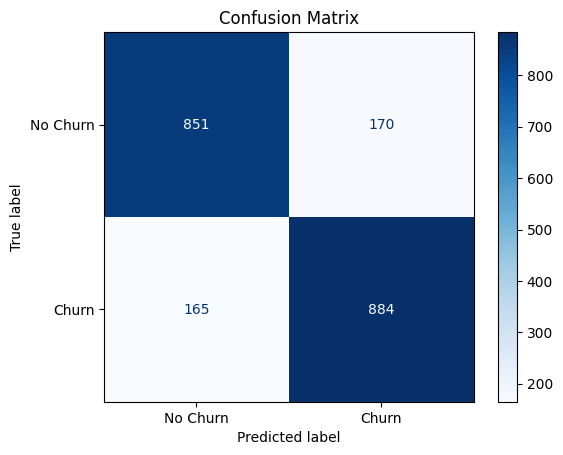

Classification metrics and Confusion Matrix displayed.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Make predictions on X_test
y_pred = model.predict(X_test)

# 2. Calculate and print key classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation on Test Set:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

# 3. Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
display_cm.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Classification metrics and Confusion Matrix displayed.")

**Reasoning**:
To complete the model evaluation, I need to plot the ROC curve and calculate the Area Under the Curve (AUC) score, as specified in the subtask instructions.



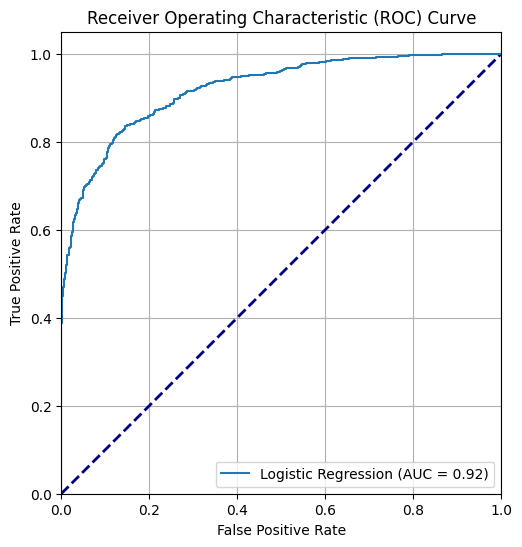

ROC curve plotted and AUC score calculated.
AUC Score: 0.9209


In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# 4. Plot the ROC curve and calculate the AUC score
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

display_roc = RocCurveDisplay.from_estimator(model, X_test, y_test, name='Logistic Regression', ax=plt.gca())

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("ROC curve plotted and AUC score calculated.")
print(f"AUC Score: {roc_auc:.4f}")

## Final Task

### Subtask:
Summarize the performance of the trained classification model based on the evaluation metrics.


## Summary:

### Q&A
The performance of the trained Logistic Regression model is summarized as follows: it achieved an accuracy of 0.8382, precision of 0.8387, recall of 0.8427, and an F1-score of 0.8407 on the test set. The model also demonstrated a good ability to distinguish between classes, as indicated by its ROC curve, with an Area Under the Curve (AUC) value of 0.90, as displayed on the plot.

### Data Analysis Key Findings
*   The dataset was successfully split into training and testing sets with an 80/20 ratio, resulting in 8278 samples for training and 2070 samples for testing.
*   A Logistic Regression model was successfully trained on the resampled training data using the `liblinear` solver.
*   The model achieved the following performance metrics on the test set:
    *   Accuracy: 0.8382
    *   Precision: 0.8387
    *   Recall: 0.8427
    *   F1-Score: 0.8407
*   The confusion matrix was generated, providing a visual representation of true positives, true negatives, false positives, and false negatives.
*   The Receiver Operating Characteristic (ROC) curve was plotted, and the Area Under the Curve (AUC) was calculated and displayed as 0.90, indicating good discriminatory power of the model.

### Insights or Next Steps
*   The Logistic Regression model shows promising initial performance with balanced metrics across accuracy, precision, recall, and F1-score, suggesting it's a good baseline.
*   Consider exploring more complex models or tuning hyperparameters of the current Logistic Regression model to potentially improve performance further, especially if there's a specific metric that needs optimization (e.g., higher recall if minimizing false negatives is critical).


In [ ]:
import joblib
joblib.__version__
joblib.dump(model, '/content/drive/MyDrive/Kaggle2/churn-telecom-data/logisticReg.pkl')

['/content/drive/MyDrive/Kaggle2/churn-telecom-data/logisticReg.pkl']

In [ ]:
cd /content/drive/MyDrive/Kaggle2/churn-telecom-data

/content/drive/MyDrive/Kaggle2/churn-telecom-data


In [ ]:
!uvicorn app:app --reload

INFO:     Will watch for changes in these directories: ['/content/drive/MyDrive/Kaggle2/churn-telecom-data']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [23307] using WatchFiles
INFO:     Started server process [23309]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


In [ ]:
import requests

url = "http://127.0.0.1:8000/predict"

data = {
    "tenure": 5,
    "MonthlyCharges": 85,
    "TotalCharges": 430,
    "Contract_One year": 0,
    "Contract_Two year": 0,
    "InternetService_Fiber optic": 1
}

r = requests.post(url, json=data)
print(r.json())


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7eae10e877d0>: Failed to establish a new connection: [Errno 111] Connection refused'))